# runtime-plotter-sandbox
1.26.23

This notebook takes the output from `runtime-production.py` and generates plots
for runtime vs dataset size. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# plotting templates
sns.set(context="talk", style="ticks") 
sns.set_palette("tab10")

#### Read in the runtimes dataframe

In [2]:
rt_df = pd.read_csv("runtimes-mf.csv")
#rt_df

#### Log the runtimes
This will allow us to fit everything on the same plot. 

In [3]:
# rt_df["NMF sec"] = np.log(rt_df["NMF sec"])
# rt_df["kNN sec"] = np.log(rt_df["kNN sec"])
# rt_df["min sec"] = np.log(rt_df["min sec"])
# rt_df["std sec"] = np.log(rt_df["std sec"])
# rt_df["mf sec"] = np.log(rt_df["mf sec"])
# rt_df

#### Take a crack at plotting
kNN really blows up the scale. Unless you're in log space. 

In [4]:
# plt.figure()
# sns.scatterplot(
#     data=rt_df, x="n observations", y="NMF sec", label="NMF")
# sns.scatterplot(
#     data=rt_df, x="n observations", y="kNN sec", label="kNN")
# sns.scatterplot(
#     data=rt_df, x="n observations", y="min sec", label="Sample Min", alpha=0.5)
# sns.scatterplot(
#     data=rt_df, x="n observations", y="std sec", label="Gaussian sample", alpha=0.5)

# # turn off opacity for the legend handles
# leg = plt.legend(bbox_to_anchor=(1,1), frameon=True, edgecolor="grey")
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
    
# plt.xlabel("n observations", labelpad=10)
# plt.ylabel("runtime (seconds)", labelpad=10)
# plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

***

## Trying to add in trend lines
With a couple of different strategies

#### Fit a polynomial 
(of degree _n_)

In [5]:
# # needs to be sorted for the polynomial fitting to work
# rt_df_sorted = rt_df.sort_values(by="n observations")

# n_obs = np.array(rt_df_sorted["n observations"]) # x
# nmf_rt = np.array(rt_df_sorted["NMF sec"])       # y

# # fit an n degree polynomial
# poly = PolynomialFeatures(degree=2, include_bias=False)
# # get features -- the reshape bit converts it into a 2D array
# poly_features = poly.fit_transform(n_obs.reshape(-1, 1))

# # init the regression model
# poly_reg_model = LinearRegression()
# # fit the regression model 
# poly_reg_model.fit(poly_features, nmf_rt)
# # get predictions
# y_predicted = poly_reg_model.predict(poly_features)

#### Plot

In [6]:
# plt.figure()
# sns.scatterplot(
#     data=rt_df, x="n observations", y="NMF sec", label="NMF")
# plt.plot(n_obs, y_predicted, c="salmon", alpha=0.7)

# sns.scatterplot(
#     data=rt_df, x="n observations", y="min sec", label="Sample min", alpha=0.5)
# sns.scatterplot(
#     data=rt_df, x="n observations", y="std sec", label="Gaussian sample", alpha=0.5)

# # turn off opacity for the legend handles
# leg = plt.legend(bbox_to_anchor=(1,1), frameon=True, edgecolor="grey")
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
    
# plt.xlabel("n observations", labelpad=10)
# plt.ylabel("runtime (seconds)", labelpad=10)
# plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

#### Here I fit a linear regression model 

In [7]:
# # get the X and Y vectors
# n_obs = np.array(rt_df["n observations"]) # x
# nmf_rt = np.array(rt_df["NMF sec"])       # y

# # reshape
# n_obs_rs = n_obs.reshape(-1,1)
# nmf_rt_rs = nmf_rt.reshape(-1,1)

# # create linear regression object
# regr = linear_model.LinearRegression()

# # train the model using the training sets
# regr.fit(n_obs_rs, nmf_rt_rs)

# x_test = np.linspace(np.min(n_obs), np.max(n_obs), 100)
# x_test_rs = x_test.reshape(-1,1)

# # make predictions using the testing set
# y_pred_nmf = regr.predict(x_test_rs)

#### Overlay the linear regression model onto the existing scatter plot

In [8]:
# plt.figure()
# sns.scatterplot(
#     data=rt_df, x="n observations", y="NMF sec", label="NMF")
# plt.plot(x_test, y_pred_nmf, color="darkblue", linewidth=2.5, alpha=0.7)

# sns.scatterplot(
#     data=rt_df, x="n observations", y="min sec", label="Sample Min", alpha=0.5)
# sns.scatterplot(
#     data=rt_df, x="n observations", y="std sec", label="Gaussian sample", alpha=0.5)

# # turn off opacity for the legend handles
# leg = plt.legend(bbox_to_anchor=(1,1), frameon=True, edgecolor="grey")
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
    
# plt.xlabel("n observations", labelpad=10)
# plt.ylabel("runtime (seconds)", labelpad=10)
# plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

#### Fit linear regression model to kNN as well

In [9]:
# # get the X and Y vectors
# n_obs = np.array(rt_df["n observations"]) # x
# knn_rt = np.array(rt_df["kNN sec"])       # y

# # reshape
# n_obs_rs = n_obs.reshape(-1,1)
# knn_rt_rs = knn_rt.reshape(-1,1)

# # create linear regression object
# regr = linear_model.LinearRegression()

# # train the model using the training sets
# regr.fit(n_obs_rs, knn_rt_rs)

# x_test = np.linspace(np.min(n_obs), np.max(n_obs), 100)
# x_test_rs = x_test.reshape(-1,1)

# # make predictions using the testing set
# y_pred_knn = regr.predict(x_test_rs)

In [10]:
# plt.figure()
# sns.scatterplot(
#     data=rt_df, x="n observations", y="NMF sec", label="NMF")
# plt.plot(x_test, y_pred_nmf, color="darkblue", linewidth=2.5, alpha=0.7)
# plt.plot(x_test, y_pred_knn, color="orange", linewidth=2.5, alpha=0.7)

# sns.scatterplot(
#     data=rt_df, x="n observations", y="min sec", label="Sample Min", alpha=0.5)
# sns.scatterplot(
#     data=rt_df, x="n observations", y="std sec", label="Gaussian sample", alpha=0.5)

# # turn off opacity for the legend handles
# leg = plt.legend(bbox_to_anchor=(1,1), frameon=True, edgecolor="grey")
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
    
# plt.xlabel("n observations", labelpad=10)
# plt.ylabel("runtime (seconds)", labelpad=10)
# plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

***

## Polynomial fitting is promising
Lets do that for all four methods. Might want these to be different degrees for each impute method. 

In [11]:
# needs to be sorted for the polynomial fitting to work
rt_df_sorted = rt_df.sort_values(by="n observations")

n_obs = np.array(rt_df_sorted["n observations"]) # x

#### Fit polynomial to NMF

In [12]:
nmf_rt = np.array(rt_df_sorted["NMF sec"])  # y

# fit an n degree polynomial
nmf_poly = PolynomialFeatures(degree=2, include_bias=False)
# get features -- the reshape bit converts it into a 2D array
nmf_pfeatures = nmf_poly.fit_transform(n_obs.reshape(-1, 1))

# init the regression model
nmf_preg = LinearRegression()
# fit the regression model 
nmf_preg.fit(nmf_pfeatures, nmf_rt)
# get predictions
y_pred_nmf = nmf_preg.predict(nmf_pfeatures)

#### Fit polynomial to kNN

In [13]:
knn_rt = np.array(rt_df_sorted["kNN sec"])  # y

# fit an n degree polynomial
knn_poly = PolynomialFeatures(degree=2, include_bias=False)
# get features -- the reshape bit converts it into a 2D array
knn_pfeatures = knn_poly.fit_transform(n_obs.reshape(-1, 1))

# init the regression model
knn_preg = LinearRegression()
# fit the regression model 
knn_preg.fit(knn_pfeatures, knn_rt)
# get predictions
y_pred_knn = knn_preg.predict(knn_pfeatures)

#### Fit polynomial to sample min
Probably makes sense to do a 1 degree polynomial for this one. 

In [14]:
min_rt = np.array(rt_df_sorted["min sec"])  # y

# fit an n degree polynomial
min_poly = PolynomialFeatures(degree=1, include_bias=False)
# get features -- the reshape bit converts it into a 2D array
min_pfeatures = min_poly.fit_transform(n_obs.reshape(-1, 1))

# init the regression model
min_preg = LinearRegression()
# fit the regression model 
min_preg.fit(min_pfeatures, min_rt)
# get predictions
y_pred_min = min_preg.predict(min_pfeatures)

#### Fit polynomial to Gaussian sample 
Doing degree 1 here as well. 

In [15]:
std_rt = np.array(rt_df_sorted["std sec"])  # y

# fit an n degree polynomial
std_poly = PolynomialFeatures(degree=1, include_bias=False)
# get features -- the reshape bit converts it into a 2D array
std_pfeatures = std_poly.fit_transform(n_obs.reshape(-1, 1))

# init the regression model
std_preg = LinearRegression()
# fit the regression model 
std_preg.fit(std_pfeatures, std_rt)
# get predictions
y_pred_std = std_preg.predict(std_pfeatures)

#### Fit polynomial to missForest
This is basically linear, so maybe only a 1 degree polynomial is needed?

In [16]:
mf_rt = np.array(rt_df_sorted["mf sec"])  # y

# fit an n degree polynomial
mf_poly = PolynomialFeatures(degree=2, include_bias=False)
# get features -- the reshape bit converts it into a 2D array
mf_pfeatures = mf_poly.fit_transform(n_obs.reshape(-1, 1))

# init the regression model
mf_preg = LinearRegression()
# fit the regression model 
mf_preg.fit(mf_pfeatures, mf_rt)
# get predictions
y_pred_mf = mf_preg.predict(mf_pfeatures)

#### Get plot
Four layers of scatterplot, four layers of fitted polynomials.

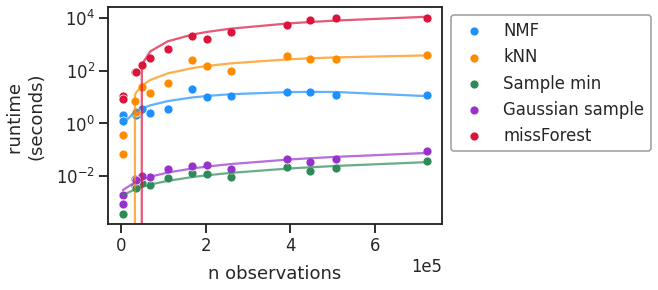

In [17]:
fig = plt.figure()

sns.scatterplot(
    data=rt_df, x="n observations", y="NMF sec", 
    label="NMF", color="dodgerblue")
plt.plot(n_obs, y_pred_nmf, c="dodgerblue", alpha=0.7)

sns.scatterplot(
    data=rt_df, x="n observations", y="kNN sec", 
    label="kNN", color="darkorange")
plt.plot(n_obs, y_pred_knn, c="darkorange", alpha=0.7)

sns.scatterplot(
    data=rt_df, x="n observations", y="min sec", 
    label="Sample min", color="seagreen")
plt.plot(n_obs, y_pred_min, c="seagreen", alpha=0.7)

sns.scatterplot(
    data=rt_df, x="n observations", y="std sec", 
    label="Gaussian sample", color="darkorchid")
plt.plot(n_obs, y_pred_std, c="darkorchid", alpha=0.7)

sns.scatterplot(
    data=rt_df, x="n observations", y="mf sec", 
    label="missForest", color="crimson")
plt.plot(n_obs, y_pred_mf, c="crimson", alpha=0.7)

# get legend
plt.legend(bbox_to_anchor=(1,1), frameon=True, edgecolor="grey")

# label axes
plt.xlabel("n observations", labelpad=10)
plt.ylabel("runtime \n(seconds)", labelpad=10)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

# log the y axis
plt.yscale('log')

#plt.savefig("runtimes-plotted-log-axes.png", dpi=250, bbox_inches="tight")

#### Why don't we just try a simple line plot? 
I think this looks better. 

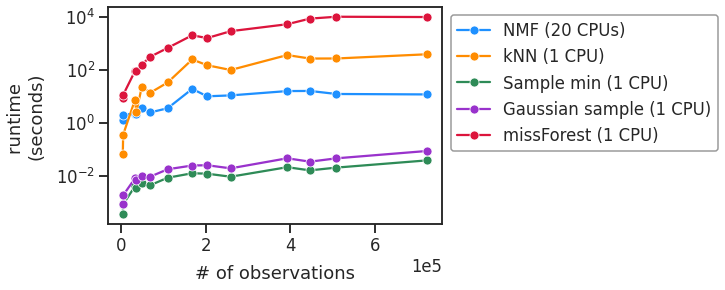

In [18]:
fig = plt.figure()

sns.lineplot(
    data=rt_df, x="n observations", y="NMF sec", 
    label="NMF (20 CPUs)", color="dodgerblue", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="kNN sec", 
    label="kNN (1 CPU)", color="darkorange", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="min sec", 
    label="Sample min (1 CPU)", color="seagreen", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="std sec", 
    label="Gaussian sample (1 CPU)", color="darkorchid", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="mf sec", 
    label="missForest (1 CPU)", color="crimson", marker="o")

# get legend
plt.legend(bbox_to_anchor=(1,1), frameon=True, edgecolor="grey")

# label axes
plt.xlabel("# of observations", labelpad=10)
plt.ylabel("runtime \n(seconds)", labelpad=10)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

# log the y axis
plt.yscale('log')

#plt.savefig("runtimes-plotted-log-axes-w-cpu.png", dpi=250, bbox_inches="tight")

#### Same thing (line plot), but don't label the number of CPUs

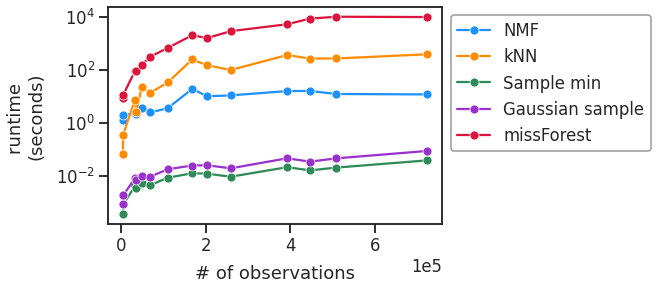

In [19]:
fig = plt.figure()

sns.lineplot(
    data=rt_df, x="n observations", y="NMF sec", 
    label="NMF", color="dodgerblue", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="kNN sec", 
    label="kNN", color="darkorange", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="min sec", 
    label="Sample min", color="seagreen", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="std sec", 
    label="Gaussian sample", color="darkorchid", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="mf sec", 
    label="missForest", color="crimson", marker="o")

# get legend
plt.legend(bbox_to_anchor=(1,1), frameon=True, edgecolor="grey")

# label axes
plt.xlabel("# of observations", labelpad=10)
plt.ylabel("runtime \n(seconds)", labelpad=10)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

# log the y axis
plt.yscale('log')

#plt.savefig("runtimes-plotted-lineplot.png", dpi=250, bbox_inches="tight")

#### Using a pre-specified color palette
matplotlib tab10

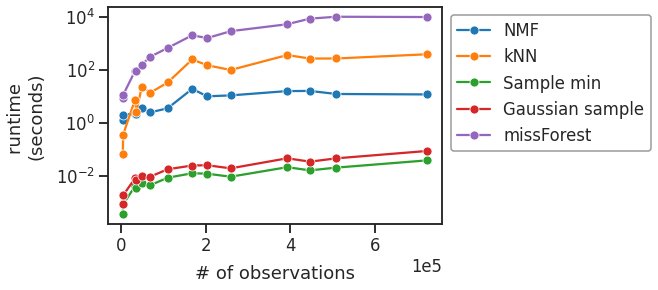

In [27]:
fig = plt.figure()

sns.lineplot(
    data=rt_df, x="n observations", y="NMF sec", 
    label="NMF", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="kNN sec", 
    label="kNN", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="min sec", 
    label="Sample min", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="std sec", 
    label="Gaussian sample", marker="o")

sns.lineplot(
    data=rt_df, x="n observations", y="mf sec", 
    label="missForest", marker="o")

# get legend
plt.legend(bbox_to_anchor=(1,1), frameon=True, edgecolor="grey")

# label axes
plt.xlabel("# of observations", labelpad=10)
plt.ylabel("runtime \n(seconds)", labelpad=10)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

# log the y axis
plt.yscale('log')

#plt.savefig("runtimes-plotted-lineplot-cp.png", dpi=250, bbox_inches="tight")

#### Whats going on with missForest? or kNN? 

In [20]:
# # MISSFOREST POLYNOMIAL FIT
# mf_rt = np.array(rt_df_sorted["mf sec"])  # y

# # fit an n degree polynomial
# mf_poly = PolynomialFeatures(degree=1, include_bias=False)
# # get features -- the reshape bit converts it into a 2D array
# mf_pfeatures = mf_poly.fit_transform(n_obs.reshape(-1, 1))

# # init the regression model
# mf_preg = LinearRegression()
# # fit the regression model 
# mf_preg.fit(mf_pfeatures, mf_rt)
# # get predictions
# y_pred_mf = mf_preg.predict(mf_pfeatures)

# # KNN POLYNOMIAL FIT
# knn_rt = np.array(rt_df_sorted["kNN sec"])  # y

# # fit an n degree polynomial
# knn_poly = PolynomialFeatures(degree=2, include_bias=False)
# # get features -- the reshape bit converts it into a 2D array
# knn_pfeatures = knn_poly.fit_transform(n_obs.reshape(-1, 1))

# # init the regression model
# knn_preg = LinearRegression()
# # fit the regression model 
# knn_preg.fit(knn_pfeatures, knn_rt)
# # get predictions
# y_pred_knn = knn_preg.predict(knn_pfeatures)

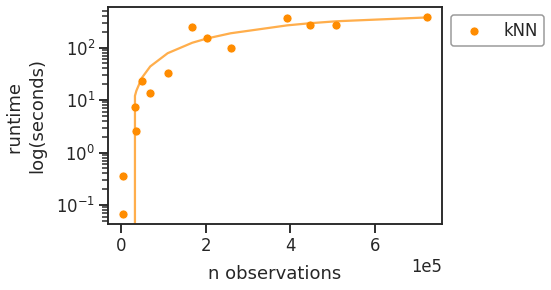

In [21]:
# fig = plt.figure()

# sns.scatterplot(
#     data=rt_df, x="n observations", y="kNN sec", 
#     label="kNN", color="darkorange")
# plt.plot(n_obs, y_pred_knn, c="darkorange", alpha=0.7)

# # sns.scatterplot(
# #     data=rt_df, x="n observations", y="mf sec", 
# #     label="missForest", color="crimson")
# # plt.plot(n_obs, y_pred_mf, c="crimson", alpha=0.7)

# # get legend
# plt.legend(bbox_to_anchor=(1,1), frameon=True, edgecolor="grey")

# # label axes
# plt.xlabel("n observations", labelpad=10)
# plt.ylabel("runtime \nlog(seconds)", labelpad=10)
# plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

# # log the y axis
# plt.yscale('log')

***

## Taking another look at kNN
Because its trend line is a bit funky.
Maybe 3rd degree polynomial fits a bit better here? 

In [22]:
# knn_rt = np.array(rt_df_sorted["kNN sec"])  # y

# # fit an n degree polynomial
# knn_poly = PolynomialFeatures(degree=3, include_bias=False)
# # get features -- the reshape bit converts it into a 2D array
# knn_pfeatures = knn_poly.fit_transform(n_obs.reshape(-1, 1))

# # init the regression model
# knn_preg = LinearRegression()
# # fit the regression model 
# knn_preg.fit(knn_pfeatures, knn_rt)
# # get predictions
# y_pred_knn = knn_preg.predict(knn_pfeatures)

In [23]:
# sns.scatterplot(
#     data=rt_df, x="n observations", y="kNN sec", 
#     label="kNN", color="darkorange")
# plt.plot(n_obs, y_pred_knn, c="darkorange", alpha=0.7)

# # turn off opacity for the legend handles
# leg = plt.legend(bbox_to_anchor=(1,1), frameon=True, edgecolor="grey")
# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
    
# plt.xlabel("n observations", labelpad=10)
# plt.ylabel("runtime \nlog(seconds)", labelpad=10)
# plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

# #plt.savefig("runtimes-plotted-mf.png", dpi=250, bbox_inches="tight")

***

## What if we try the dual y-axis idea? 

In [24]:
# # instantiate the first set of axes
# fig, ax1 = plt.subplots(figsize=(6,6))

# # instantiate a second set of axes that shares the same x-axis
# ax2 = ax1.twinx()

# sns.scatterplot(
#     data=rt_df, x="n observations", y="NMF sec", 
#     label="NMF", color="dodgerblue", ax=ax1)
# ax1.plot(n_obs, y_pred_nmf, c="dodgerblue", alpha=0.7)

# sns.scatterplot(
#     data=rt_df, x="n observations", y="kNN sec", 
#     label="kNN", color="darkorange", ax=ax1)
# ax1.plot(n_obs, y_pred_knn, c="darkorange", alpha=0.7)

# sns.scatterplot(
#     data=rt_df, x="n observations", y="min sec", 
#     label="Sample min", color="seagreen", ax=ax1)
# ax1.plot(n_obs, y_pred_min, c="seagreen", alpha=0.7)

# sns.scatterplot(
#     data=rt_df, x="n observations", y="std sec", 
#     label="Gaussian sample", color="darkorchid", ax=ax1)
# ax1.plot(n_obs, y_pred_std, c="darkorchid", alpha=0.7)

# sns.scatterplot(
#     data=rt_df, x="n observations", y="mf sec", 
#     label="missForest", color="crimson", ax=ax2)
# ax2.plot(n_obs, y_pred_mf, c="crimson", alpha=0.7)
    
# ax1.set_xlabel("n observations", labelpad=10)
# ax1.set_ylabel("runtime \nlog(seconds)", labelpad=10)
# ax1.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

# # ax2.set_ylabel("missForest runtime \nlog(seconds)", labelpad=10)
# ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# # get legend
# ax1.legend(bbox_to_anchor=(1.3,1))
# ax2.get_legend().remove()

***

## Or what about just side-by-side plots
One for everything else, one for missForest. 
This might be our best bet. 

In [25]:
# # init subplot object
# fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12,5))

# # plot NMF
# sns.scatterplot(
#     data=rt_df, x="n observations", y="NMF sec", 
#     label="NMF", color="dodgerblue", ax=axes[0])
# axes[0].plot(n_obs, y_pred_nmf, c="dodgerblue", alpha=1.0)

# # plot kNN
# sns.scatterplot(
#     data=rt_df, x="n observations", y="kNN sec", 
#     label="kNN", color="darkorange", ax=axes[0])
# axes[0].plot(n_obs, y_pred_knn, c="darkorange", alpha=0.7)

# # plot sample min
# sns.scatterplot(
#     data=rt_df, x="n observations", y="min sec", 
#     label="Sample min", color="seagreen", ax=axes[0])
# axes[0].plot(n_obs, y_pred_min, c="seagreen", alpha=0.7)

# # plot Gaussian sample
# sns.scatterplot(
#     data=rt_df, x="n observations", y="std sec", 
#     label="Gaussian sample", color="darkorchid", ax=axes[0])
# axes[0].plot(n_obs, y_pred_std, c="darkorchid", alpha=0.7)

# # plot missForest
# sns.scatterplot(
#     data=rt_df, x="n observations", y="mf sec", 
#     label="missForest", color="crimson", ax=axes[1])
# axes[1].plot(n_obs, y_pred_mf, c="crimson", alpha=1.0)

# # label left subplot
# axes[0].set_xlabel("n observations")
# axes[0].set_ylabel("runtime \n(log) seconds")
# axes[0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

# # label right subplot
# axes[1].set_xlabel("n observations")
# axes[1].set_ylabel("runtime \n(log) seconds")
# axes[1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
# axes[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))

# # combine the labels and handles from both axes
# handles0, labels0 = axes[0].get_legend_handles_labels()
# handles1, labels1 = axes[1].get_legend_handles_labels()

# handles_comb = handles0 + handles1
# labels_comb = labels0 + labels1

# # get legend
# fig.legend(handles_comb, labels_comb, bbox_to_anchor=(1.235, 0.9))
# axes[0].get_legend().remove()
# axes[1].get_legend().remove()

# fig.tight_layout()

#plt.savefig("runtime-combined.png", dpi=250, bbox_inches="tight")